# Overview

Using Sentinal (SentinalHub) data and ML pipeline to classify landcover

1. Explore data
2. Label data by merging NARCAN land class dataset with Sentinal data (rasters)
    - Each pixel should end up with a feature set (sentinal data) and a label (NARCAN class data)
3. Train & Test model
4. Iterate

**Questions**:
- Extracting the tiffs from EO I get an annoying error I have to click through
- NARCAN data is 2015? Should we concern ourselves with this or that's just part of the inaccuracy we can expect?

# Steps

## Data Collection

Many ways to view data from sentinal hub:
- Using their visual product (EO)
- Download raw as tiff for any gis (Q or Arc)
- Use WMS url to create configurations to insert in webGIS app
- API?

When merging data ensure the same **projection** of `WGS48` (Sentinal data is in this projection):
1. in the overall *project* 
2. NRCAN set
    - only apply to a *clipped* area of interest since transformations are taxing
    - nearest neighbor
    
Change resolution of both layers to match (save as -> set resolution)

Converting aligned visual layers to data to feed into classifier
- Resources: rasterio, video of loading geo images into python, collab notebook from recipe 2 or 3

### Classification

NARCAN classes:

Value 1, Temperate or sub-polar needleleaf forest, RGB 0 0.24 0;   
Value 2, Sub-polar taiga needleleaf forest, RGB 0.58 0.61 0.44;  
Value 3, Tropical or sub-tropical broadleaf evergreen forest  
Value 4, Tropical or sub-tropical broadleaf deciduous forest  
Value 5, Temperate or sub-polar broadleaf deciduous forest, RGB 0.08 0.55 0.24;   
Value 6, Mixed forest, RGB 0.36 0.46 0.17;   
Value 7, Tropical or sub-tropical shrubland;
Value 8, Temperate or sub-polar shrubland, RGB 0.7 0.54 0.2;   
Value 9, Tropical or sub-tropical shrubland;
Value 10, Temperate or sub-polar grassland, RGB 0.88 0.81 0.54;  
Value 11, Sub-polar or polar shrubland-lichen-moss, RGB 0.61 0.46 0.33;   
Value 12, Sub-polar or polar grassland-lichen-moss, RGB 0.73 0.83 0.56;   
Value 13, Sub-polar or polar barren-lichen-moss, RGB 0.25 0.54 0.45;   
Value 14, Wetland, RGB 0.42 0.64 0.54;  
Value 15, Cropland, RGB 0.9 0.68 0.4;  
Value 16, Barren lands, RGB 0.66 0.67 0.68;  
Value 17, Urban, RGB 0.86 0.13 0.15;  
Value 18, Water, RGB 0.3 0.44 0.64;  
Value 19, Snow and Ice, RGB 1 0.98 1.  


Classification imbalance? -> Should we seek even classes (via visualizations or histogram of NARCAN extent used) or do something about it?
- Note 1: If we do want to try and get a decent amount of every class: it should be fairly simple to stitch together different areas? Since it the image needs to be flattened anyway we're reducing dims then appending to create one input
- Note 2: checking month of narcan set so the snow and ice is more accurate? or trying to avoid it?

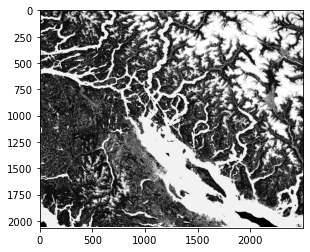

In [1]:
#test extent, edited and transformed to WGS84 via QGIS
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open('../data_tests/sentinal_1/NRCAN_transformed.tif')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 19)

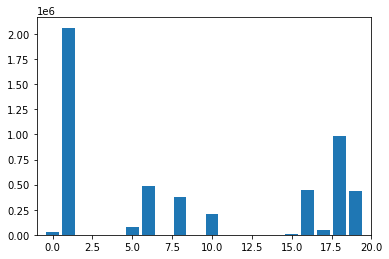

In [2]:
#function to create histogram of scenes class frequency
def nrcan_hist(img):
    import numpy as np
    import pandas as pd
    from collections import Counter

    im_array = np.array(img)

    #last line is bad values 
    im_array = im_array[:-1]

    #value count
    freq = Counter(im_array.flatten())

    plt.bar(freq.keys(), freq.values())
    plt.xlim([-1, 20])
    
nrcan_hist(im) #[0 and 19 but should only have 18 values? what is 0 what is 19 in this graph?]

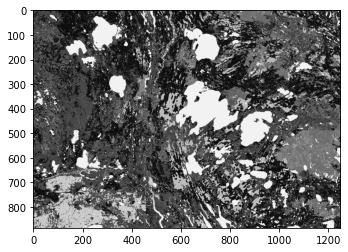

In [9]:
im2 = Image.open('../data_tests/sentinal_2/NRCAN_transformed.tif')
plt.imshow(im2, cmap = 'gray', vmin = 0, vmax = 19)

In [12]:
import numpy as np

In [13]:
np.asarray(im2)

array([[ 1,  8,  1, ...,  1,  1,  1],
       [ 8,  8,  1, ...,  1,  1,  1],
       [ 1,  8,  6, ...,  1,  1,  1],
       ...,
       [18, 15, 15, ...,  1,  1,  6],
       [18, 15, 15, ...,  1,  6,  6],
       [15, 15, 15, ...,  1,  1,  1]], dtype=uint8)

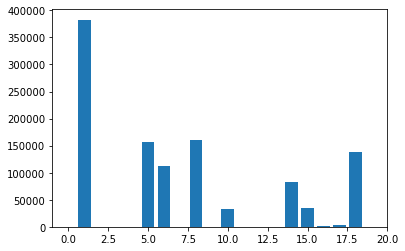

In [10]:
#different test area chosen for diverse classes
nrcan_hist(im2)

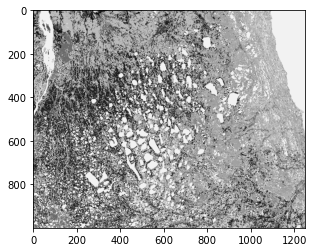

In [7]:
im3 = Image.open('../data_tests/sentinal_3/NRCAN_transformed.tif')
plt.imshow(im3, cmap = 'gray', vmin = 0, vmax = 19)

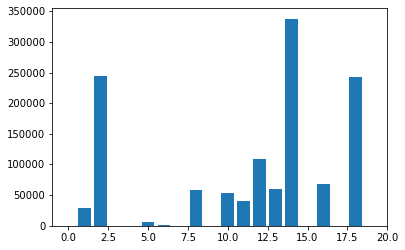

In [8]:
nrcan_hist(im3)